## Testing

In [1]:
import pickle
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Dropout
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [2]:
feature_list = np.array(pickle.load(open('image_features.pkl', 'rb')))

feature_list.shape

(20001, 2048)

In [3]:
image_paths = np.array(pickle.load(open('image_paths.pkl', 'rb')))

image_paths.shape

(20001,)

In [4]:
# load the pre-trained ResNet50 model
model = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
model.trainable = False
# model.summary()

model = tf.keras.Sequential([model, GlobalMaxPooling2D()])
model.build(input_shape=(None, 224, 224, 3))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [5]:
image_path = "./sample/jersey.png"

In [6]:
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
res = model.predict(preprocessed_img).flatten()
normalized_res =  res / norm(res) # L2 Normalization

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


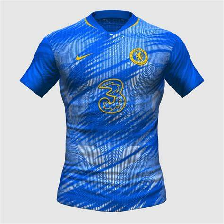

In [7]:
img

In [8]:
normalized_res.shape

(2048,)

In [9]:
from sklearn.neighbors import NearestNeighbors

In [10]:
neighbors = NearestNeighbors(n_neighbors=5, algorithm='kd_tree',metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='kd_tree', metric='euclidean')

In [11]:
distances, indexes = neighbors.kneighbors([normalized_res])

In [12]:
print(distances)

[[0.72916465 0.72930625 0.73779315 0.74062783 0.74211917]]


In [13]:
print(indexes)

[[6943 4947  511 6947  507]]


In [14]:
def relative_sort(arr1, arr2):
    index_map = {val: i for i, val in enumerate(arr2)}

    sorted_arr1 = sorted(arr1, key=lambda x: index_map.get(x, float('inf')))

    return sorted_arr1

sorted_dist = relative_sort(indexes[0], distances[0])
sorted_ind = distances[0]
sorted_ind.sort()

print(sorted_dist, sorted_ind)

[6943, 4947, 511, 6947, 507] [0.72916465 0.72930625 0.73779315 0.74062783 0.74211917]


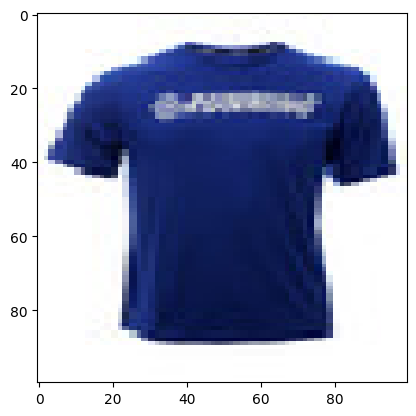

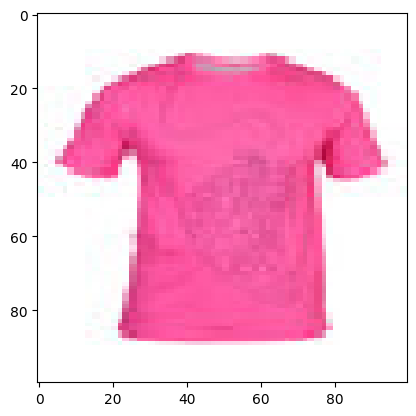

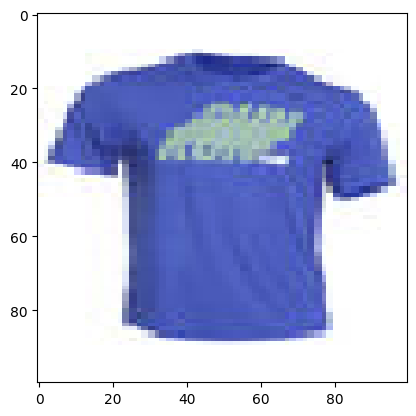

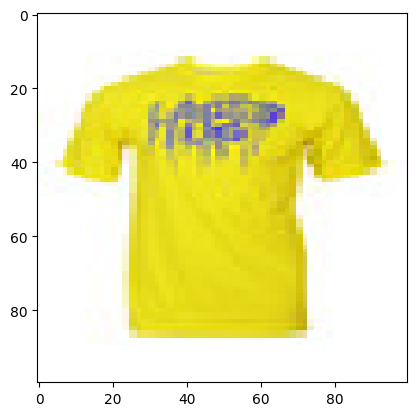

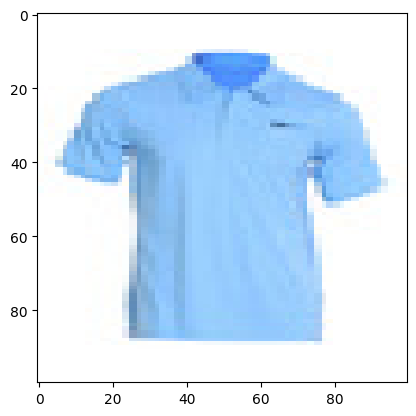

In [15]:
for index in indexes[0]:
    # print(image_paths[file])
    img = image.load_img(image_paths[index], target_size=(100, 100))
    plt.imshow(img)
    plt.show()